# Una Introducción a Pandas

Esta libreta es una modificación (sin muchos cambios) de la introducción a Pandas realizada por Julians Evans y que se encuentra dentro de la (documentación oficial de Pandas)[https://github.com/jvns/pandas-cookbook], Unas cosas se redujeron, y otras se dejaron en forma de ejercicios para practicar diferentes cosas.

In [1]:
# Figuras en linea
import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)      # Tamaño de las gráficas

matplotlib.style.use('ggplot')



## 1 Leyendo datos de un archivo csv

Para leer archivos CSV, se utiliza la función `read_csv`. Por default se asume la coma como el indicador de separación. Vamos a ver un conjunto de datos sobre [ciclistas en la ciudad de Montreal](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage). Los cuales se encuentran ya descargados. Esta base de datos describe la cantidad de ciclistas que transitaron por 7 diferentes rutas por día.

In [2]:
broken_df = pd.read_csv('bikes.csv')

In [3]:
# Vamos a ver las 3 primeras entradas
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


Ups! Así, los datos no son útiles. Afortunadamente, `read_csv` viene con un montón de opciones para ajustarse a los diferentes archivos CSV. En particular es necesario:

* cambiar el indicador de columna por  `;`
* Cambiar la codificación por `'latin1'` (por default es `'utf8'`)
* Transformar los datos de la columna `Date` a algun tipo estandar `datetime`  
* Avisar que el estilo de los datos es francés (como en español) esto es día/mes/año
* Hacer que el índice sea la columna `Date`

In [4]:
fixed_df = pd.read_csv('bikes.csv', sep=';', encoding='utf8', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [5]:
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


## 2 Seleccionar columnas

In [6]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

## 3 Graficar datos

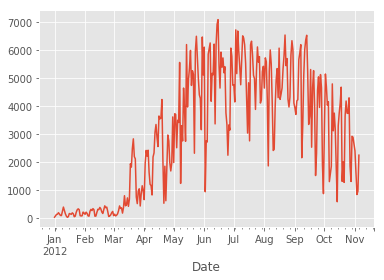

In [7]:
fixed_df['Berri 1'].plot()

Igualmente se pueden graficar todos los días al mismo tiempo. Para ver mejor habrá que hacer un poco más grande la figura. Si bien es poco lo que se puede sacar de conclusión en este gráfico, se puede observar que el comportamiento de todos los caminos son más o menos parecidos. Igualmente, por las estacones, podríamos asociar de alguna manera el comportaiento de los ciclistas con el clima.

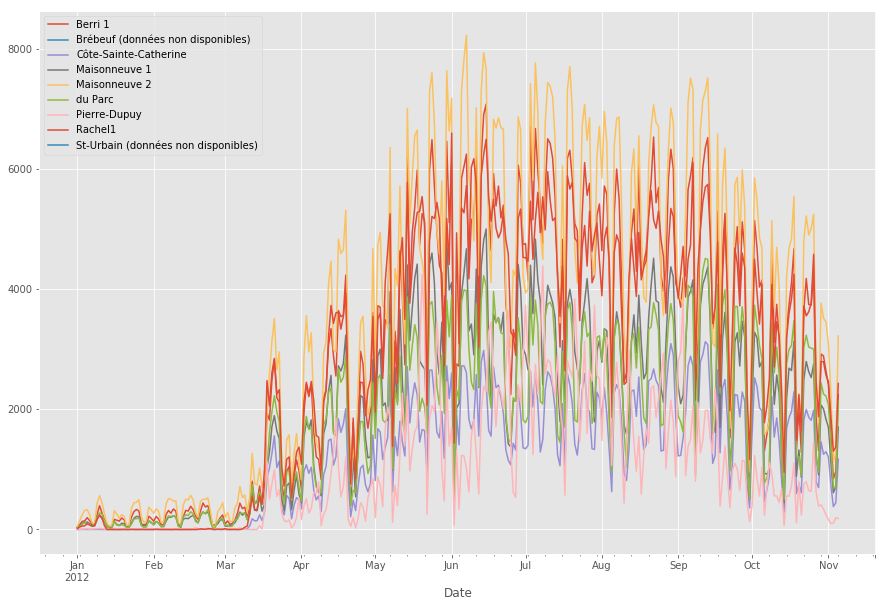

In [8]:
fixed_df.plot(figsize=(15, 10))

### Ejercicio: Grafica 3 rutas únicamente desde la entrada 130 a la 160 (los días del verano)

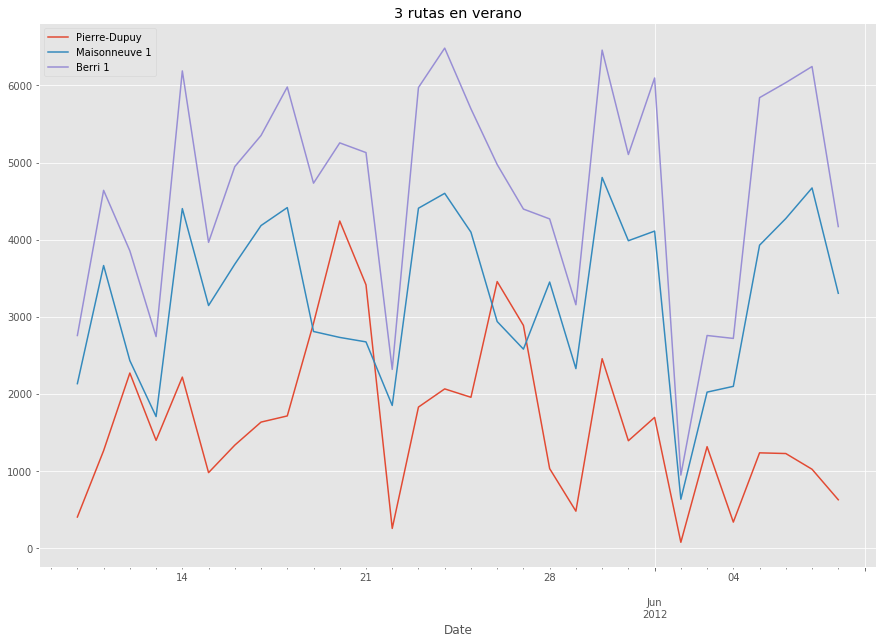

In [9]:
# Escribe aquí tu código
fixed_df['Pierre-Dupuy'][130:160].plot(figsize=(15, 10),title='3 rutas en verano',legend=True)
fixed_df['Maisonneuve 1'][130:160].plot(legend=True)
fixed_df['Berri 1'][130:160].plot(legend=True)

## 4 Extraer una columna y transformar el índice (fecha)

Supongamos ahora que tenemos la siguiente pregunta ¿Que día de la semana la gente circula más por el trayecto *Berri 1* (una ciclovía al lado de una calle principal de Montreal). Bueno, lo que tendríamos que hacer es extraer la columna que nos interesa como un nuevo *DataFrame* y luego agregarle una nueva variable como es el día de la semana.

Primero copiemos físicamente la coluna que nos interesa

In [10]:
berri_bikes = fixed_df[['Berri 1']].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Ahora tenemos que malipular las fechas, las cuales se encuentran en el índice del *DataFrame*

In [11]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

Curioso que lo que se registró solo llego hasta el 5 de noviembre del 2012 ¿Verdad? Ahora podemos usar las facilidades que nos dá Pandas para manipular fechas. Por ejemplo, si queremos el día del mes:

In [12]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

y si queremos el día de la semana:

In [13]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

Ahora agregamos una nueva variable a nuestro *DataFrame* de manera bastante intuitiva

In [14]:
berri_bikes.loc[:, u'Día de la semana'] = berri_bikes.index.weekday
berri_bikes.head()

,Berri 1,Día de la semana
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## 5 Agregación de información

Ahora nos falta agregar la información, y para eso vamos a utilizar el método `.groupby` de la clase *DataFrame*, el cual es muy parecido al que se usa en SQL. Veamos como se utiliza en forma básica, pero revisa la [documentación](http://pandas.pydata.org/pandas-docs/stable/groupby.html), ya que es una herramienta muy poderosa para el análisis y tratamiento de los datos.

In [15]:
paseos_por_dia = berri_bikes.groupby(u'Día de la semana').aggregate(sum)
paseos_por_dia

,Berri 1
Día de la semana,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


¿Días de la semana de 0 a 6? Eso no tiene mucho sentido si queremos seguir usando esta información para análisis posteriores. Es una buena práctica procurar que todas las columnas tengan nombres significativos, y que los valores se codifiquen de una manera que sean claros.

In [16]:
paseos_por_dia.index = ['Lunes', 'Martes', u'Miércoles', 'Jueves', 'Viernes', u'Sábado', 'Domingo']
paseos_por_dia

,Berri 1
Lunes,134298
Martes,135305
Miércoles,152972
Jueves,160131
Viernes,141771
Sábado,101578
Domingo,99310


¡Mejor! Y mucho mejor si lo visualizamos como una gráfica:

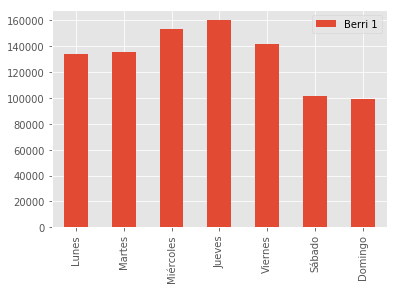

In [17]:
paseos_por_dia.plot(kind='bar')

Alguien podría argumentar que las cuentas totales no es la mejor manera que representar lo que pasa en cada día, porque la variabilidad podría ser factor importante. Como la observación nos parece válida, hagámos el análisis de otra manera.

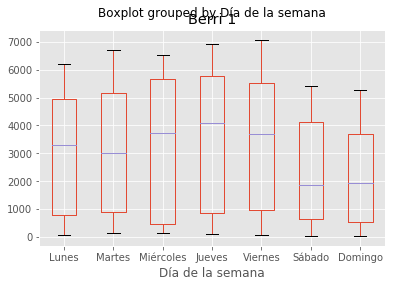

In [18]:
berri_bikes.replace({u'Día de la semana': {0:'Lunes', 1:'Martes', 2:u'Miércoles', 3:'Jueves', 
                                           4:'Viernes', 5:u'Sábado', 6:'Domingo'}}, inplace=True)

berri_bikes.boxplot(column=u'Berri 1', by=u'Día de la semana', 
                    positions= [7, 4, 1, 2, 3, 6, 5])         # Las posiciones es para mantener el orden alfabético



Estas gráficas se conocen como *Box Plots* y son muy útiles para visualizar la distribución de datos. La línea roja representa la mediana (o quantil 50) la cajita es el rango en que se encuentran el 90% de los valores, y las líneas representan los valores mínimos y máximos.

### Ejercicio: Responde a la pregunta ¿Que tanto sale la gente a andar en bicicleta por Montreal por més del año en el 2012?

In [ ]:
# Agrega todo tu código aqui, no es necesario hacerlo por partes
# Agregamos el mes al data frame.
fixed_df.loc[:, u'Mes'] = fixed_df.index.month

# Conseguimos la suma de los ciclistas por mes en cada una de las 7 rutas.
salidaMes = fixed_df.groupby(u'Mes').aggregate(sum)
salidaMes.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                       'Agosto', 'Septiembre', 'Octubre', 'Noviembre']

# Conseguimos el total de ciclistas en cada mes.
salidaMes.loc[:, u'Total'] = salidaMes.sum(axis=1)

salidaMes['Total'].plot(figsize = (10,8), kind = 'pie', title = 'Ciclistas por mes del 2012')